## Initial preparation

In [1]:
from matplotlib.pyplot import imshow
import cv2
import sys

sys.path.append('/garmentor/')

from vis.visualizers.keypoints import KeypointsVisualizer
from vis.visualizers.body import BodyVisualizer
from data.generate.pregenerator import DataPreGenerator

## Random parameters

In [2]:
data_generator = DataPreGenerator()
pose, shape, _, cam_t = data_generator.generate_random_params()

pose[0] = 0.
pose[1] = 0.
pose[2] = 0.

## Visualize keypoints

In [3]:
keypoints_visualizer_orthographic = KeypointsVisualizer(projection_type='orthographic')
keypoints_visualizer_perspective = KeypointsVisualizer(projection_type='perspective')

# 1. The keypoints are reversed.
# 2. The connections seem incorrect.

Keypoint visualizer projection type: orthographic
Keypoint visualizer projection type: perspective


(256, 256, 3)
255


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - imwrite() missing required argument 'img' (pos 2)
>  - imwrite() missing required argument 'img' (pos 2)


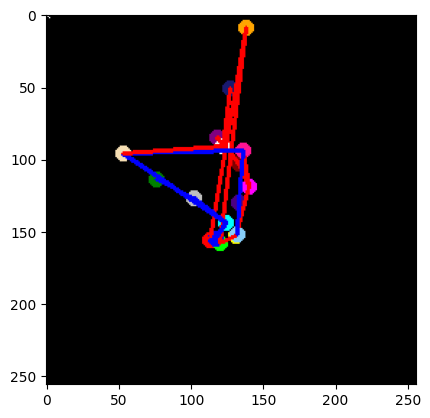

In [13]:
kpt_img_orthographic = keypoints_visualizer_orthographic.vis_from_params(
    pose=pose,
    shape=shape,
    cam_t=cam_t,
    gender='male'
)
print(kpt_img_orthographic.shape)
print(kpt_img_orthographic.max())
kpt_img_orthographic[0, 0] = (255, 255, 255)
kpt_img_orthographic[1, 1] = (255, 255, 255)
kpt_img_orthographic[2, 2] = (255, 255, 255)
imshow(kpt_img_orthographic)
cv2.imwrite('keypoints.png', kpt_img_orthographic)

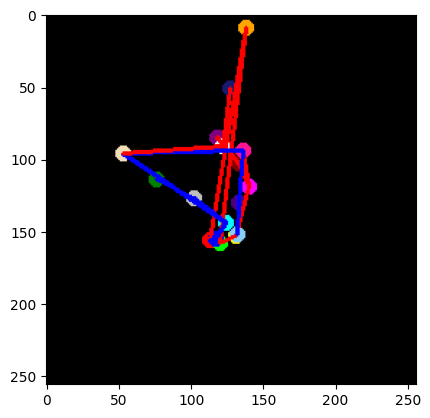

In [5]:
kpt_img_perspective = keypoints_visualizer_orthographic.vis_from_params(
    pose=pose,
    shape=shape,
    cam_t=cam_t,
    gender='male'
)
imshow(kpt_img_perspective)

## Visualize body


Renderer projection type: perspective


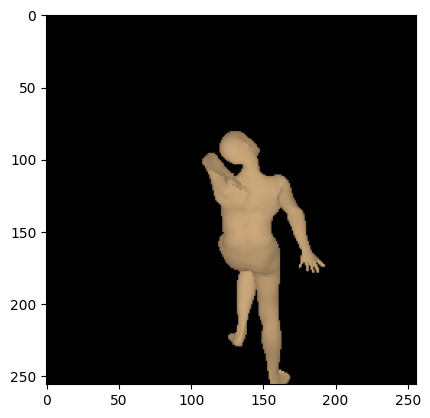

In [3]:
body_visualizer = BodyVisualizer(device='cpu')
body_img, body_mask = body_visualizer.vis_from_params(
    pose=pose,
    shape=shape,
    cam_t=cam_t,
    gender='male'
)
#print(body_img[250, :, 0])
#body_img[1, 1] = (255, 255, 255)
#body_img[2, 2] = (255, 255, 255) 
imshow(body_img / 255.)
#cv2.imwrite('body.png', body_img)

# 1: The body faces against the camera -> when facing the front (matrix R is diag([-1, 1, -1])), the shader details are not visible (single skin color only).

## Conclusions

### Orientations

**Body visualizer.** The body visualizer uses renderers. The renderers account for the inverse standard of the visualization packages such as matplotlib and cv2 and therefore return the body in a "proper" orientation for the visualization. However, the body is in fact inversed w.r.t. to the actual values inside of the resulting numpy array, i.e., the head has a smaller coordinate than the feet. This means that the values which would go into the model are incorrect, i.e., the model unnecessarily learns inversed models, instead of the non-inversed ones.

**Keypoints visualizer.** On the contrary, the keypoints visualizer does not use renderers. The keypoint projections are done "manually", which makes the projections done properly and the resulting values correct, i.e., non-inversed. This is good for the model, but not good for the visualization. In order to properly visualize the keypoints using the visualization packages, the keypoint coordinates should be inversed.

### White body images

White body images do not happen because of the errors in the rendering process. Instead, the white color comes from the fact that the values are clipped to 1. because the expected range for the visualization package is [0., 1.] and not [0, 255]. So, the images fed to the model should be correct, but they are not properly shown in Visdom.